Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4695 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3039 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2835 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2729 - accuracy: 0.9234
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2955 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1559 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1233 - accuracy: 0.9720
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1075 - accuracy: 0.9772
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1107 - accuracy: 0.9744
Epoch 1/5
1875/1875 [======

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0860 - accuracy: 0.9734
Epoch 2/5
1859/1875 [============================>.] - ETA: 0s - loss: 0.0793 - accuracy: 0.9749

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0792 - accuracy: 0.9749
Epoch 3/5
1872/1875 [============================>.] - ETA: 0s - loss: 0.0735 - accuracy: 0.9767

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0735 - accuracy: 0.9767
Epoch 4/5
1856/1875 [============================>.] - ETA: 0s - loss: 0.0704 - accuracy: 0.9779

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0702 - accuracy: 0.9779
Epoch 5/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.0628 - accuracy: 0.9794

313/313 [==============================] - 1s 2ms/step - loss: 0.0722 - accuracy: 0.9789


[0.07219382375478745, 0.9789000153541565]

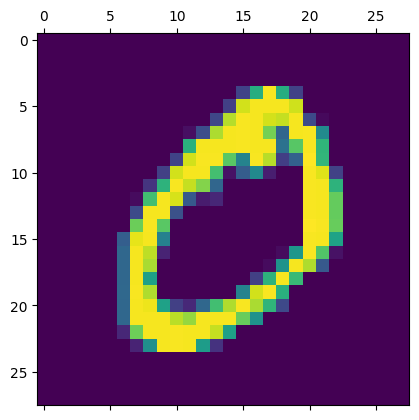

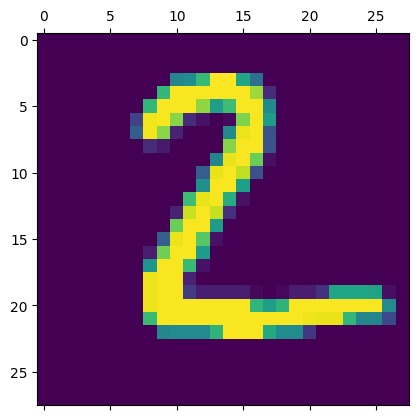

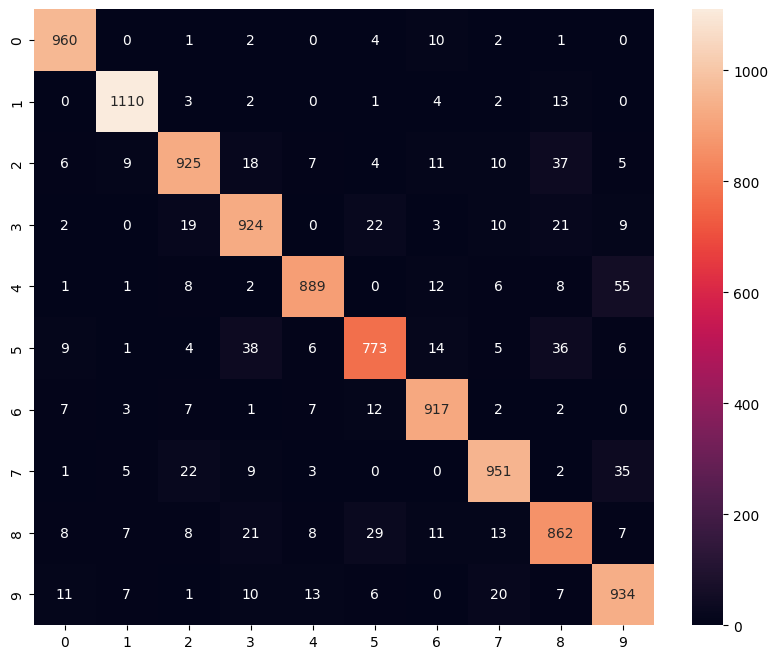

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

X_train
y_train[:5]
X_train.shape
X_train[0].shape
plt.matshow(X_train[1])
X_train = X_train / 255
X_test = X_test / 255

X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

X_train_flat.shape
model=keras.Sequential([ keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs=5)
model.evaluate(X_test_flat,y_test)
y_pred=model.predict(X_test_flat)
y_pred[0]
plt.matshow(X_test[1])
np.argmax(y_pred[1])
y_pred_labels=[np.argmax(i) for i in y_pred]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d')

from keras import regularizers
model1=keras.Sequential([
keras.layers.Dense(100,input_shape=(784,),activation='relu',kernel_regularizer=regularizers.l2 (0.0001)),
keras.layers.Dense(10,activation='sigmoid')])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train_flat,y_train,epochs=5)
model1.evaluate(X_test_flat,y_test)
model2=keras.Sequential([ keras.layers.Dense(100,input_shape=(784,),activation='relu',kernel_regularizer=regularizers.l1
(0.0001)),
keras.layers.Dense(10,activation='sigmoid')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)
model2.fit(X_train_flat,y_train,epochs=5)
model2.evaluate(X_test_flat,y_test)

from keras.layers import Dropout
model3=keras.Sequential([
keras.layers.Dense(100,input_shape=(784,),activation='relu'), Dropout(0.25), keras.layers.Dense(10,activation='sigmoid')
])

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)
model3.fit(X_train_flat,y_train,epochs=5)
model3.evaluate(X_test_flat,y_test)
from keras.callbacks import EarlyStopping
model3.fit(X_train_flat,y_train,epochs=5,callbacks = [EarlyStopping(monitor='val_acc', patience
=2)])


model3.evaluate(X_test_flat,y_test)



